# Comparison of textile Imports to US from World vs China
#### Harsh Shah, Christopher Rosales, Yu-Wen Chen

## Objective

In this analysis, we will analyze certain aspect of the textile industry and the United States Trade with China. More specifically, we want to gain insight into the behavior of these different categories of the textile industry and see how they react to one another. The data comes from the United States Department of Commerce, with monthly import data from China, from 2003 through 2020.

We want to analyze the correlation between the different textile categories holistically, then in the 2008 recession era, and finally in the current Covid-19 era. If we can identify strong correlations, the stakeholder can make a better decision on what category of the textile industry to focus on. They can study this specific category closely, and use the past data from the 2008 recession to make inferences for how it might behave during the current Covid crisis.

The stakeholder for this would be the US Department of Commerce, which normally is called upon to make suggestions in trade/tariff policy making. Insight into correlations between textile categories can help influence where efforts are best spent.

In [155]:
library(GGally)
library(tidyverse)

In [3]:
#loading data
data <- read.csv("new_data.csv")

### Data Exploration(1/4)

In [132]:
#printing first 20 rows
head(data, 12)

Category,Item,X2003,X2004,X2005,X2006,X2007,X2008,X2009,X2010,...,Oct.03,Sep.03,Aug.03,Jul.03,Jun.03,May.03,Apr.03,Mar.03,Feb.03,Jan.03
,,,,,,,,,,...,,,,,,,,,,
200/301,Imports from the world ($),"277,430,029","415,842,557","414,534,831","372,199,929","289,041,401","279,894,752","226,077,990","280,791,228",...,"23,495,184","23,771,968","23,282,649","25,092,423","25,120,897","24,815,030","23,481,272","22,836,845","19,523,163","18,821,608"
200/301,Imports from China ($),"8,984,223","16,395,205","28,310,203","18,401,779","12,724,670","16,461,879","14,817,764","23,676,756",...,"925,311","743,319","1,002,834","1,209,634","720,384","663,289","734,490","466,547","627,371","496,201"
200/301,China share (percent),3.2,3.9,6.8,4.9,4.4,5.9,6.6,8.4,...,3.9,3.1,4.3,4.8,2.9,2.7,3.1,2,3.2,2.6
,,,,,,,,,,...,,,,,,,,,,
200/301,World quantity (kilograms),"66,666,546","85,222,969","91,082,387","87,310,277","60,203,116","55,425,586","40,456,599","45,495,025",...,"5,844,903","5,722,542","5,989,484","6,591,494","6,230,411","5,976,049","5,645,941","5,250,181","4,676,217","4,274,614"
200/301,Quantity from China (kilograms),"2,416,042","3,067,676","6,949,753","3,813,085","2,701,794","3,599,327","2,946,804","4,901,616",...,"237,210","199,220","259,855","373,204","209,326","160,613","215,321","147,631","149,992","145,931"
200/301,China quantity share (percent),3.6,3.6,7.6,4.4,4.5,6.5,7.3,10.8,...,4.1,3.5,4.3,5.7,3.4,2.7,3.8,2.8,3.2,3.4
,,,,,,,,,,...,,,,,,,,,,
200/301,World unit value ($ per kilogram),4.16,4.88,4.55,4.26,4.8,5.05,5.59,6.17,...,4.02,4.15,3.89,3.81,4.03,4.15,4.16,4.35,4.17,4.4


We can see that the above table contains information about textile imports that are arranged according to categories and year. It also distinguishes amount of imports from world and china. For our analysis, we only need imports in dollars.

### Data Exploration(2/4)

In [5]:
#import in dollars from world and china
imports <- data %>% filter(Item %in% c("Imports from the world ($)", "Imports from China ($)"))
imports <- subset(imports[1:19])
head(imports,10)

Category,Item,X2003,X2004,X2005,X2006,X2007,X2008,X2009,X2010,X2011,X2012,X2013,X2014,X2015,X2016,X2017,X2018,X2019
200/301,Imports from the world ($),"277,430,029","415,842,557","414,534,831","372,199,929","289,041,401","279,894,752","226,077,990","280,791,228","298,672,712","280,739,873","310,345,671","302,598,547","304,875,585","258,294,284","267,937,460","284,468,926","241,519,107"
200/301,Imports from China ($),"8,984,223","16,395,205","28,310,203","18,401,779","12,724,670","16,461,879","14,817,764","23,676,756","28,385,492","38,796,069","56,022,057","39,453,680","41,977,880","39,118,205","44,728,677","60,433,950","43,633,421"
222,Imports from the world ($),"784,634,904","742,935,566","746,187,183","739,609,652","608,743,785","492,052,643","417,633,208","491,395,780","582,081,068","651,605,099","685,556,751","736,583,989","743,856,690","739,876,438","698,680,361","731,426,998","640,534,798"
222,Imports from China ($),"42,833,655","46,337,000","73,590,660","60,714,696","62,595,686","63,886,401","105,862,106","148,340,338","206,270,402","278,787,432","312,989,813","320,097,103","343,506,586","351,277,976","313,000,481","317,651,304","220,567,928"
229,Imports from the world ($),"778,245,261","878,593,955","974,096,414","888,992,331","892,619,631","908,657,541","788,279,175","1,000,862,014","1,182,651,357","1,230,552,372","1,267,983,490","1,355,100,992","1,411,539,731","1,404,754,824","1,437,437,235","1,560,186,828","1,500,228,995"
229,Imports from China ($),"63,862,852","122,362,635","174,253,750","112,067,212","100,525,706","128,890,120","119,087,104","145,205,662","206,755,287","258,846,802","281,228,389","316,523,948","370,854,783","390,369,320","409,974,889","453,144,037","319,019,446"
332/432/632-T/632-B (includes baby socks),Imports from the world ($),"616,583,182","706,418,460","744,022,166","849,604,077","1,388,750,004","1,440,144,046","1,383,172,851","1,670,418,233","1,749,325,037","1,821,655,463","1,902,802,631","2,003,342,109","2,183,183,687","1,962,245,180","2,022,250,417","2,128,603,647","2,156,672,701"
332/432/632-T/632-B (includes baby socks),Imports from China ($),"8,493,539","12,744,469","38,189,334","80,042,190","383,587,377","442,834,895","538,730,469","692,666,040","800,371,131","944,786,162","1,058,571,395","1,092,421,189","1,271,775,298","1,184,395,528","1,216,729,716","1,351,588,513","1,368,602,234"
338/339,Imports from the world ($),"5,305,674,779","5,282,114,781","5,963,771,835","13,393,790,459","14,153,665,326","13,521,356,173","12,171,783,894","13,587,793,950","14,098,301,839","12,596,623,279","12,830,240,043","12,474,439,662","12,189,581,130","11,024,238,698","11,000,290,355","11,877,007,032","12,409,275,200"
338/339,Imports from China ($),"92,748,655","96,717,389","324,077,440","851,642,337","1,255,548,181","1,317,452,469","2,495,292,410","3,288,215,347","3,279,471,023","3,044,799,325","3,142,878,540","2,841,469,166","2,595,106,615","2,194,076,683","2,177,751,102","2,273,532,466","1,954,839,330"


Here, we have extracted all the rows which contain data about import in dollars from world and china

### Data Exploration(3/4)

In [6]:
imports[,1]

[1] 200/301                                  
 [2] 200/301                                  
 [3] 222                                      
 [4] 222                                      
 [5] 229                                      
 [6] 229                                      
 [7] 332/432/632-T/632-B (includes baby socks)
 [8] 332/432/632-T/632-B (includes baby socks)
 [9] 338/339                                  
[10] 338/339                                  
[11] 340/640                                  
[12] 340/640                                  
[13] 345/645/646                              
[14] 345/645/646                              
[15] 347/348                                  
[16] 347/348                                  
[17] 349/649                                  
[18] 349/649                                  
[19] 352/652                                  
[20] 352/652                                  
[21] 359-S/659-S                              
[22] 359-S/659-S                              
[23] 363                                      
[24] 363                                      
[25] 443                                      
[26] 443                                      
[27] 447                                      
[28] 447                                      
[29] 619                                      
[30] 619                                      
[31] 620                                      
[32] 620                                      
[33] 622                                      
[34] 622                                      
[35] 638/639                                  
[36] 638/639                                  
[37] 647/648                                  
[38] 647/648                                  
[39] 666                                      
[40] 666                                      
[41] 847                                      
[42] 847                                      
22 Levels:  200/301 222 229 ... 847

Here, we can see different categories of materials that are imported

### Data Exploration(4/4)

In [7]:
#Sturcture of data
str(imports)

'data.frame':	42 obs. of  19 variables:
 $ Category: Factor w/ 22 levels "","200/301","222",..: 2 2 3 3 4 4 5 5 6 6 ...
 $ Item    : Factor w/ 25 levels "","China quantity share (percent)",..: 10 9 10 9 10 9 10 9 10 9 ...
 $ X2003   : Factor w/ 157 levels "","0","0.37",..: 61 141 138 85 136 118 116 139 92 154 ...
 $ X2004   : Factor w/ 157 levels "","0","0.71",..: 98 47 141 102 152 35 138 32 109 157 ...
 $ X2005   : Factor w/ 157 levels "","0","0.46",..: 96 67 142 139 157 45 141 91 104 82 ...
 $ X2006   : Factor w/ 163 levels "","0.54","0.55",..: 87 52 137 123 156 23 152 148 31 153 ...
 $ X2007   : Factor w/ 167 levels "","0.63","0.64",..: 75 28 127 128 162 22 10 89 36 5 ...
 $ X2008   : Factor w/ 168 levels "","0.53","0.6",..: 77 45 108 132 167 31 9 103 34 7 ...
 $ X2009   : Factor w/ 166 levels "","0.47","0.5",..: 60 36 104 18 152 27 10 123 28 50 ...
 $ X2010   : Factor w/ 166 levels "","0.48","0.67",..: 73 60 120 33 5 32 10 142 26 79 ...
 $ X2011   : Factor w/ 168 levels "","0.5","0

Here, we can see that all the column types are factors. So we need to convert them to numeric form

### Data Cleaning

In [17]:
req_data <- imports
req_data$X2003 <- as.numeric(gsub(",","",req_data$X2003))
req_data$X2004 <- as.numeric(gsub(",","",req_data$X2004))
req_data$X2005 <- as.numeric(gsub(",","",req_data$X2005))
req_data$X2006 <- as.numeric(gsub(",","",req_data$X2006))
req_data$X2007 <- as.numeric(gsub(",","",req_data$X2007))
req_data$X2008 <- as.numeric(gsub(",","",req_data$X2008))
req_data$X2009 <- as.numeric(gsub(",","",req_data$X2009))
req_data$X2010 <- as.numeric(gsub(",","",req_data$X2010))
req_data$X2011 <- as.numeric(gsub(",","",req_data$X2011))
req_data$X2012 <- as.numeric(gsub(",","",req_data$X2012))
req_data$X2013 <- as.numeric(gsub(",","",req_data$X2013))
req_data$X2014 <- as.numeric(gsub(",","",req_data$X2014))
req_data$X2015 <- as.numeric(gsub(",","",req_data$X2015))
req_data$X2016 <- as.numeric(gsub(",","",req_data$X2016))
req_data$X2017 <- as.numeric(gsub(",","",req_data$X2017))
req_data$X2018 <- as.numeric(gsub(",","",req_data$X2018))
req_data$X2019 <- as.numeric(gsub(",","",req_data$X2019))
imports <- req_data
head(imports, 6)

Category,Item,X2003,X2004,X2005,X2006,X2007,X2008,X2009,X2010,X2011,X2012,X2013,X2014,X2015,X2016,X2017,X2018,X2019
200/301,Imports from the world ($),277430029,415842557,414534831,372199929,289041401,279894752,226077990,280791228,298672712,280739873,310345671,302598547,304875585,258294284,267937460,284468926,241519107
200/301,Imports from China ($),8984223,16395205,28310203,18401779,12724670,16461879,14817764,23676756,28385492,38796069,56022057,39453680,41977880,39118205,44728677,60433950,43633421
222,Imports from the world ($),784634904,742935566,746187183,739609652,608743785,492052643,417633208,491395780,582081068,651605099,685556751,736583989,743856690,739876438,698680361,731426998,640534798
222,Imports from China ($),42833655,46337000,73590660,60714696,62595686,63886401,105862106,148340338,206270402,278787432,312989813,320097103,343506586,351277976,313000481,317651304,220567928
229,Imports from the world ($),778245261,878593955,974096414,888992331,892619631,908657541,788279175,1000862014,1182651357,1230552372,1267983490,1355100992,1411539731,1404754824,1437437235,1560186828,1500228995
229,Imports from China ($),63862852,122362635,174253750,112067212,100525706,128890120,119087104,145205662,206755287,258846802,281228389,316523948,370854783,390369320,409974889,453144037,319019446


Here, all the commas are removed and required data is converted to numeric so that we can perform computation and manipulate data.

### Data Adaptation

In [151]:
#Adding columns
Total_imports <- imports %>% mutate(Total_imports = select(. , X2003:X2019) %>% rowSums())
Total_imports <- Total_imports %>% mutate(Total_before_recession = select(., X2005:X2009) %>% rowSums())
Total_imports <- Total_imports %>% mutate(Total_after_recession = select(., X2010:X2014) %>% rowSums())

head(Total_imports, 6)

Category,Item,X2003,X2004,X2005,X2006,X2007,X2008,X2009,X2010,...,X2013,X2014,X2015,X2016,X2017,X2018,X2019,Total_imports,Total_before_recession,Total_after_recession
200/301,Imports from the world ($),277430029,415842557,414534831,372199929,289041401,279894752,226077990,280791228,...,310345671,302598547,304875585,258294284,267937460,284468926,241519107,5105264882,1581748903,1473148031
200/301,Imports from China ($),8984223,16395205,28310203,18401779,12724670,16461879,14817764,23676756,...,56022057,39453680,41977880,39118205,44728677,60433950,43633421,532321910,90716295,186334054
222,Imports from the world ($),784634904,742935566,746187183,739609652,608743785,492052643,417633208,491395780,...,685556751,736583989,743856690,739876438,698680361,731426998,640534798,11233394913,3004226471,3147222687
222,Imports from China ($),42833655,46337000,73590660,60714696,62595686,63886401,105862106,148340338,...,312989813,320097103,343506586,351277976,313000481,317651304,220567928,3268309567,366649549,1266485088
229,Imports from the world ($),778245261,878593955,974096414,888992331,892619631,908657541,788279175,1000862014,...,1267983490,1355100992,1411539731,1404754824,1437437235,1560186828,1500228995,19460782146,4452645092,6037150225
229,Imports from China ($),63862852,122362635,174253750,112067212,100525706,128890120,119087104,145205662,...,281228389,316523948,370854783,390369320,409974889,453144037,319019446,3972971942,634823892,1208560088


The above table has 3 additional columns containing total imports over the years, total imports before recession and total imports after recession. We want to explore if there are any trends.

## Descriptive Visualization

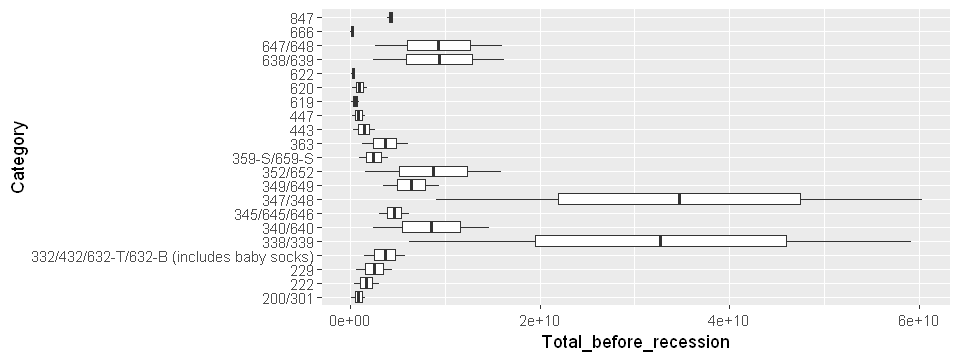

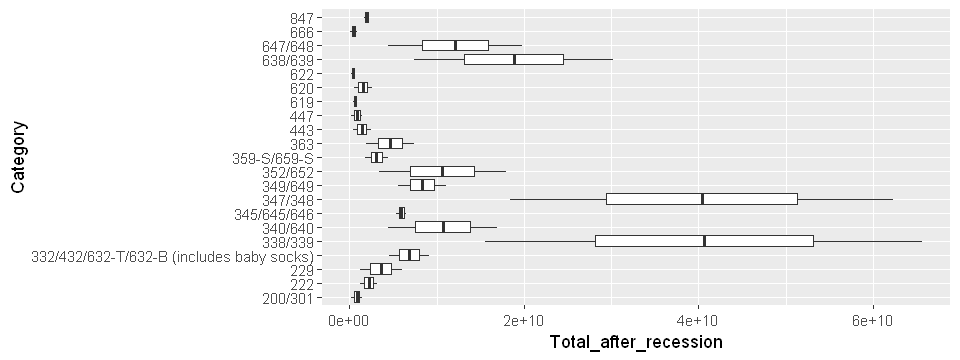

In [149]:
#Plots
options(repr.plot.width = 8, repr.plot.height = 3)

ggplot(Total_imports) +
  geom_boxplot(aes(x = Category, y= Total_before_recession)) +
coord_flip()

ggplot(Total_imports) +
  geom_boxplot(aes(x = Category, y= Total_after_recession)) +
coord_flip()

In the above plots we can see that materials like "638/639" and "338/339" has increased substantially after recession

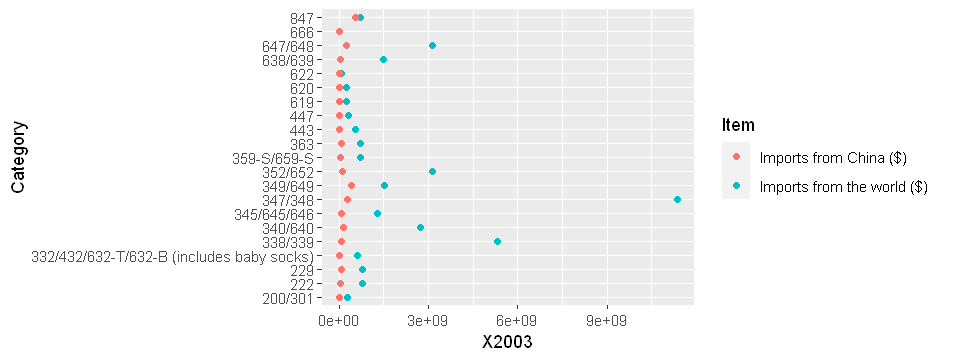

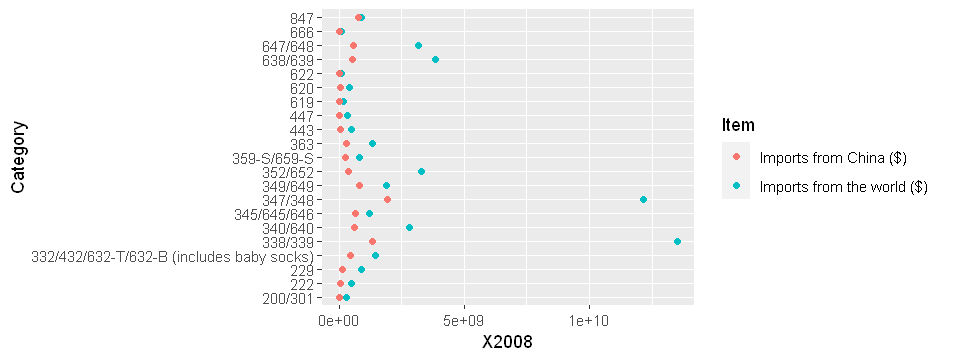

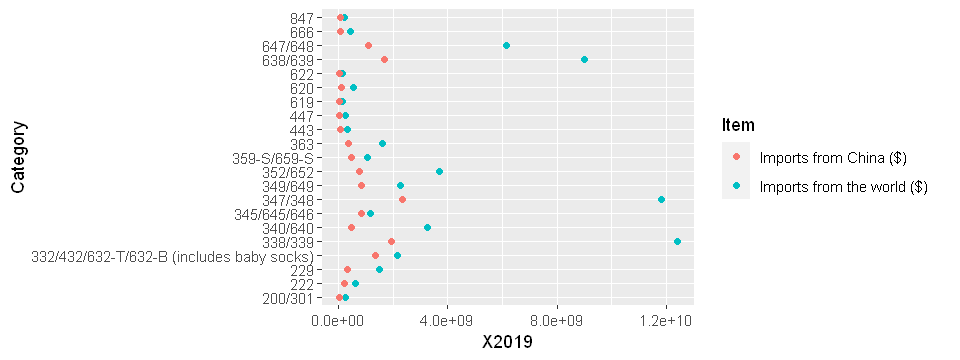

In [150]:
#Plots
options(repr.plot.width = 8, repr.plot.height = 3)

ggplot(Total_imports) +
  geom_point(aes(x = Category, y= X2003, color = Item)) +
coord_flip()

ggplot(Total_imports) +
  geom_point(aes(x = Category, y= X2008, color = Item)) +
coord_flip()

ggplot(Total_imports) +
  geom_point(aes(x = Category, y= X2019 , color = Item)) +
coord_flip()

The above graphs show how imports of different materials from World and from China. There are certain textiles like "847" that are almost imported from china. It can be seen that there has been substantial increase in imports of certain goods over the years. Also, It is observed that most of the textile imports from china was negligible in 2003. However, over the years it has increased substantially. It is very much congruent with increase in world imports. We would like to know which are those goods and what are patterns observed in further analysis.

In [152]:
#Extracting imports from china
imports_china <- imports %>% filter(Item == "Imports from China ($)")
imports_china <- subset(imports_china, select = -Item)
imports_china <- imports_china[1:18]
head(imports_china)

Category,X2003,X2004,X2005,X2006,X2007,X2008,X2009,X2010,X2011,X2012,X2013,X2014,X2015,X2016,X2017,X2018,X2019
200/301,8984223,16395205,28310203,18401779,12724670,16461879,14817764,23676756,28385492,38796069,56022057,39453680,41977880,39118205,44728677,60433950,43633421
222,42833655,46337000,73590660,60714696,62595686,63886401,105862106,148340338,206270402,278787432,312989813,320097103,343506586,351277976,313000481,317651304,220567928
229,63862852,122362635,174253750,112067212,100525706,128890120,119087104,145205662,206755287,258846802,281228389,316523948,370854783,390369320,409974889,453144037,319019446
332/432/632-T/632-B (includes baby socks),8493539,12744469,38189334,80042190,383587377,442834895,538730469,692666040,800371131,944786162,1058571395,1092421189,1271775298,1184395528,1216729716,1351588513,1368602234
338/339,92748655,96717389,324077440,851642337,1255548181,1317452469,2495292410,3288215347,3279471023,3044799325,3142878540,2841469166,2595106615,2194076683,2177751102,2273532466,1954839330
340/640,136003562,160634388,295638644,284714893,536281187,622832231,702292659,932018531,932065972,861303717,864030652,845544136,807928525,734983152,666082146,634810805,473185742


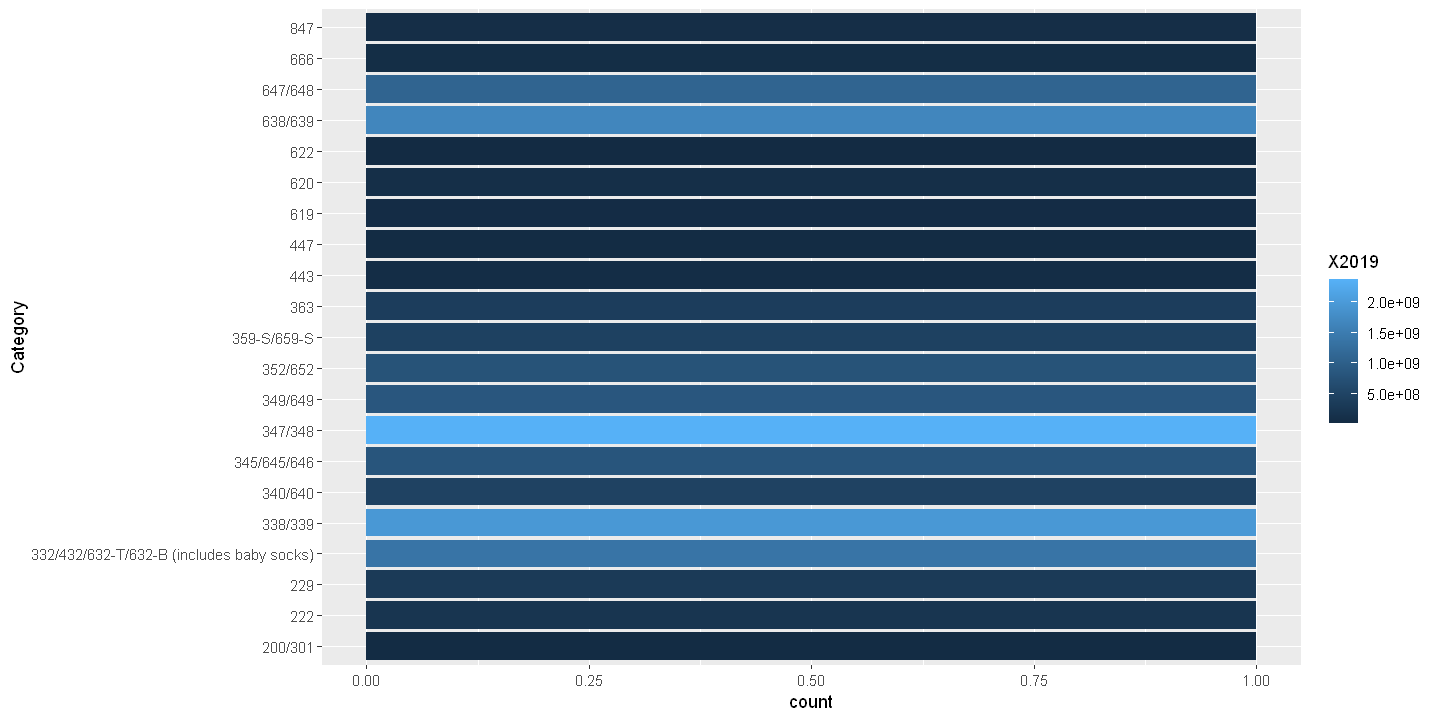

In [89]:
ggplot(imports_china) +
  geom_bar(aes(x = Category, fill = X2019)) +
coord_flip()

Here, we can see those textiles that are highest imported from china

In [48]:
n <- imports_china$Category

In [100]:
imports_china <- as.data.frame(t(imports_china[,-1]))
colnames(imports_china) <- n
imports_china$Year <- factor(row.names(imports_china))

In [101]:
textile_china <- imports_china %>% 
select("647/648", "638/639","352/652","349/649","345/645/646","340/640","347/348","338/339")
textile_china

,647/648,638/639,352/652,349/649,345/645/646,340/640,347/348,338/339
X2003,242938626,46373168,120125811,419697038,90275674,136003562,280226491,92748655
X2004,232299298,48565549,137038641,446643983,101276337,160634388,271880618,96717389
X2005,346642412,126286223,219171659,516641492,448661914,295638644,1067172888,324077440
X2006,471988048,351559478,197779318,679260972,372386888,284714893,1266127999,851642337
X2007,642451160,529975071,349130178,710724528,717172898,536281187,1766047082,1255548181
X2008,588393011,543509807,365081993,808925319,650532587,622832231,1935815989,1317452469
X2009,582227168,915584790,448694786,791507655,873221546,702292659,3048306813,2495292410
X2010,769843660,1168714885,632184698,977430972,961339369,932018531,3698536706,3288215347
X2011,858626159,1333081858,623374092,1038885207,1106722145,932065972,3511775063,3279471023
X2012,835970091,1550648435,675578605,1137335957,1032748427,861303717,3778877663,3044799325


The above table is representing imports of certain goods as variables

## Explore Correlations

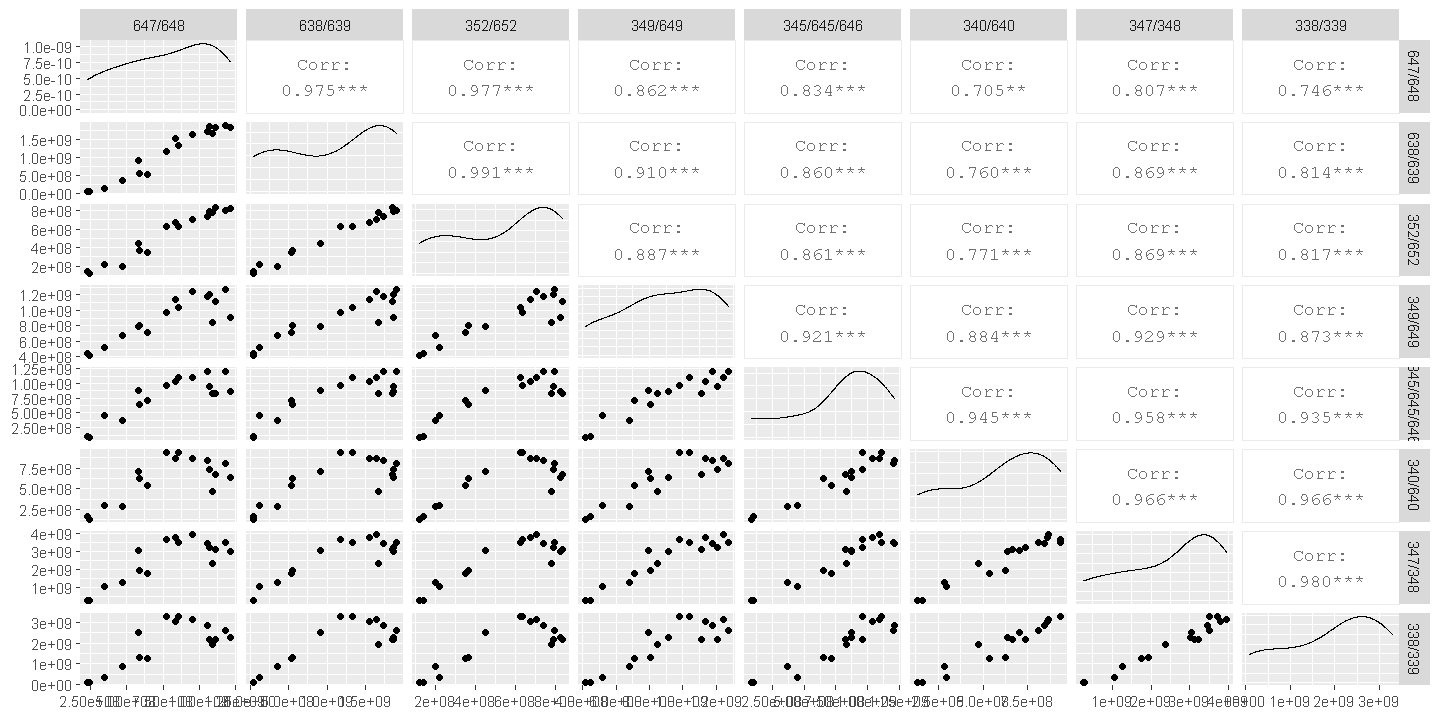

In [70]:
ggpairs(textile_china)

In the above plot, we can see various correlations between different textiles. We will choose textile "347/348" as response variable here as it is the highest imported textile from china.

## Model Building and comparison

## Simple Linear Regression

### Response variable

To form linear regression models, I chose "347/348" as my target(predicted) variable. It represets M&B cotton trousers, breeches & shorts, and W&G cotton trousers, slacks & shorts. So I want to form a model which explains the rise of import of this material . So, after running correlation tests, I have come up with this different models.

In [113]:
model1 <- lm( textile_china$"347/348" ~ textile_china$"352/652", data = textile_china)
summary(model1)


Call:
lm(formula = textile_china$"347/348" ~ textile_china$"352/652", 
    data = textile_china)

Residuals:
       Min         1Q     Median         3Q        Max 
-1.139e+09 -5.384e+08  1.317e+07  6.401e+08  8.892e+08 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             3.286e+08  3.582e+08   0.917    0.374    
textile_china$"352/652" 4.080e+00  5.984e-01   6.817 5.82e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 622800000 on 15 degrees of freedom
Multiple R-squared:  0.756,	Adjusted R-squared:  0.7397 
F-statistic: 46.48 on 1 and 15 DF,  p-value: 5.819e-06


In [114]:
model2 <- lm( textile_china$"347/348" ~ textile_china$"349/649", data = textile_china)
summary(model2)


Call:
lm(formula = textile_china$"347/348" ~ textile_china$"349/649", 
    data = textile_china)

Residuals:
       Min         1Q     Median         3Q        Max 
-575825115 -308901571   -8514721  266612037  944693468 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)             -1.120e+09  3.935e+08  -2.847   0.0122 *  
textile_china$"349/649"  4.073e+00  4.191e-01   9.719 7.26e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 466700000 on 15 degrees of freedom
Multiple R-squared:  0.863,	Adjusted R-squared:  0.8538 
F-statistic: 94.46 on 1 and 15 DF,  p-value: 7.259e-08


In [115]:
model3 <- lm( textile_china$"347/348" ~ textile_china$"345/645/646", data = textile_china)
summary(model3)


Call:
lm(formula = textile_china$"347/348" ~ textile_china$"345/645/646", 
    data = textile_china)

Residuals:
       Min         1Q     Median         3Q        Max 
-551852480 -337340492   65184656  206959240  561607596 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 -8.778e+07  2.212e+08  -0.397    0.697    
textile_china$"345/645/646"  3.354e+00  2.590e-01  12.953 1.51e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 361200000 on 15 degrees of freedom
Multiple R-squared:  0.9179,	Adjusted R-squared:  0.9125 
F-statistic: 167.8 on 1 and 15 DF,  p-value: 1.511e-09


In [116]:
model4 <- lm( textile_china$"347/348" ~ textile_china$"340/640", data = textile_china)
summary(model4)


Call:
lm(formula = textile_china$"347/348" ~ textile_china$"340/640", 
    data = textile_china)

Residuals:
       Min         1Q     Median         3Q        Max 
-632750525 -230401874  103774556  209135941  461118814 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)             -2.158e+08  2.077e+08  -1.039    0.315    
textile_china$"340/640"  4.471e+00  3.110e-01  14.375 3.53e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.28e+08 on 15 degrees of freedom
Multiple R-squared:  0.9323,	Adjusted R-squared:  0.9278 
F-statistic: 206.6 on 1 and 15 DF,  p-value: 3.534e-10


In [117]:
model5 <- lm( textile_china$"347/348" ~ textile_china$"338/339", data = textile_china)
summary(model5)


Call:
lm(formula = textile_china$"347/348" ~ textile_china$"338/339", 
    data = textile_china)

Residuals:
       Min         1Q     Median         3Q        Max 
-465919643 -182590585  -19973649  133598273  407261558 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             4.264e+08  1.273e+08    3.35  0.00439 ** 
textile_china$"338/339" 1.083e+00  5.711e-02   18.96 6.83e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 252300000 on 15 degrees of freedom
Multiple R-squared:  0.9599,	Adjusted R-squared:  0.9573 
F-statistic: 359.5 on 1 and 15 DF,  p-value: 6.828e-12


We can see that model5 is the best model among simple linear regression as it explains 95% of errors and has the least p-value. Here, the response variable is positively correlated with explanatory variable.

## Multiple Linear Regression

In [156]:
model6 <- lm( textile_china$"347/348" ~ textile_china$"338/339" + textile_china$"340/640" +
             textile_china$"349/649" + textile_china$"352/652", data = textile_china)
summary(model6)


Call:
lm(formula = textile_china$"347/348" ~ textile_china$"338/339" + 
    textile_china$"340/640" + textile_china$"349/649" + textile_china$"352/652", 
    data = textile_china)

Residuals:
       Min         1Q     Median         3Q        Max 
-252492604 -103546066  -26236437  107921839  262502278 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)   
(Intercept)             -2.071e+08  1.802e+08  -1.149  0.27290   
textile_china$"338/339"  5.739e-01  1.661e-01   3.455  0.00476 **
textile_china$"340/640"  9.597e-01  7.152e-01   1.342  0.20449   
textile_china$"349/649"  8.058e-01  4.564e-01   1.766  0.10287   
textile_china$"352/652"  5.736e-01  3.931e-01   1.459  0.17019   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 167300000 on 12 degrees of freedom
Multiple R-squared:  0.9859,	Adjusted R-squared:  0.9812 
F-statistic:   210 on 4 and 12 DF,  p-value: 5.395e-11


In [130]:
model7 <- lm( textile_china$"347/348" ~ textile_china$"338/339" + textile_china$"349/649" , data = textile_china)
summary(model7)


Call:
lm(formula = textile_china$"347/348" ~ textile_china$"338/339" + 
    textile_china$"349/649", data = textile_china)

Residuals:
       Min         1Q     Median         3Q        Max 
-259688577 -113196018    3555791   65076942  322218314 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)             -2.099e+08  1.719e+08  -1.221 0.242125    
textile_china$"338/339"  7.844e-01  7.974e-02   9.837 1.14e-07 ***
textile_china$"349/649"  1.356e+00  3.163e-01   4.287 0.000752 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 171700000 on 14 degrees of freedom
Multiple R-squared:  0.9827,	Adjusted R-squared:  0.9802 
F-statistic: 397.2 on 2 and 14 DF,  p-value: 4.673e-13


Here, Model7 is best as it has the least p-value and explains 98% of errors which is highest.

## Summary

In this analysis, we have analyzed certain aspects of the textile industry between the United States Trade volumes with China. More importantly, we have gained insight into the behavior of these different categories of the textile industry and observed how they react to one another. The data comes from the United States Department of Commerce, with monthly import data from China and the world, from 2003 through 2020. The data used for the specific research focused on imports in dollars, not volume.

We have analyzed the correlations between the different textile categories holistically, then in the 2008 recession era, and finally in the current Covid-19 era. We have identified strong correlations across the import categories, this information can be used to make a better decision on what category of the textile industry to focus on. This specific category can be monitored closely, the behavior of this category can also be studied further. The behavior during the 2008 recession can be used to make inferences about how it may behave during the current Covid-19 crisis which has caused major disruptions to local and global economies. With the pandemic originating in China, the textile industry as it relates to China will undoubtedly be affected as well.

Category “347/348” was identified as the best response variable to focus on. This category is “M&B cotton trousers, breeches & shorts, and W&G cotton trousers, slacks, & shorts”. This category was visually shown as being one of the key imports from the world ($), as well as from China ($). In 2003 it was the #1 world import, and #2 world import categories in 2008 and 2019. In imports from China it stood as the #1 import in 2008 and 2019. The main idea behind this is that it is a historically significant import in US history for both the 2008 recession as well as the current 2020 Covid-19 era. 

Another supporting visual of why this category is representative of the industry are the two charts “Total_before_recession” & “Total_after_recession”. Here we see that it is very similar to the category “338/339” as well. They both make up a very significant part of the imports in the textile industry in regards to imports from China. A feature of this visual is that the significance of the variable “347/348” remained before and after the recession of 2008. This further supports the idea that it can be used to make inferences about the industry as a whole.

The size of the imports of category “347/348” display its significance in the role it plays in the economy of the textile industry of the United States. Alongside the size of imports, this specific category also displays very high correlation with other categories of the industry. One example of this is the multiple linear regression model7. Category “347/348” responds very well to the other categories: “338/339” and 349/649“ which were both visually shown as high volume imports as well. This model produced an adjusted R-Squared of approximately 98%, and significance codes of ‘0’ amongst all coefficient variables.

In a broader view, the correlation matrix “ggpairs(textile_china)” shows how well this category interacts with other variables. Notably, the highest correlation we see with this variable is with category “338/339”, resulting in a correlation of ‘0.980’. The lowest correlation we see is with category “352/652”, resulting in a correlation of ‘0.869’. One important observation of this correlation matrix is that all of the variables behave in a positive manner. All of the correlations are positive when we look at imports from China, which leads to an interesting conclusion. The economy of the textile import industry with China is logically holistic, when the economy of this industry goes down or up, the individual categories react in the same manner respectively.

## Originality
"No other similar published works for linear regression found with same dataset" 